In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


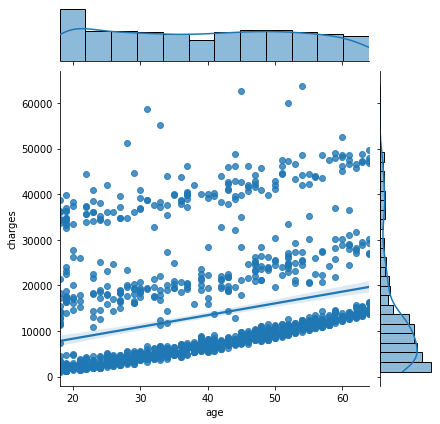

In [11]:
sns.jointplot(x=df['age'], y=df['charges'], data=df, kind='reg')


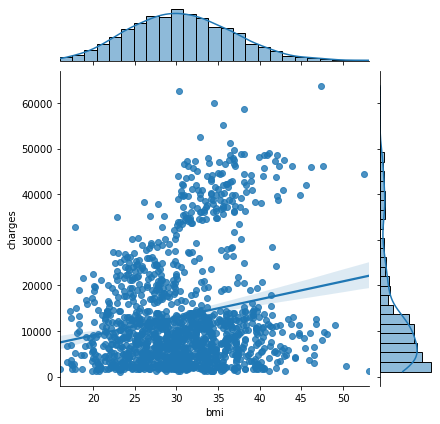

In [12]:
sns.jointplot(x=df['bmi'], y=df['charges'], data=df, kind='reg')


In [13]:
X= df[['age']]

Y=df[['charges']]
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   charges  1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train=x_train['age'].to_numpy()
x_test=x_test['age'].to_numpy()
y_train=y_train['charges'].to_numpy()
y_test=y_test['charges'].to_numpy()



x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (1070, 1)
Test - Predictors shape (268, 1)
Train - Target shape (1070, 1)
Test - Target shape (268, 1)


In [15]:
cls = linear_model.LinearRegression()
cls.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
prediction = cls.predict(x_test)
cls.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [17]:
def theta_calc(x_train, y_train):
    #Initializing all variables
    n_data = x_train.shape[0]
    
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)
    #
    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)
    #
    return theta

In [18]:
def predict_func(slope,intercept,x_test):
    #
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):

        #pred.append((slope * x_test.iloc[i]['TV']) + intercept)
        pred.append((slope * x_test[i] + intercept))
             
    return pred

In [19]:
def mse_calc(prediction, y_test):
    #
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error
def rsq(prediction, y_test):
    #
    total_data = len(prediction)
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    #
    r2 = 1 - (res_err / tot_err)
    return r2

In [20]:
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept of the model', intercept)
print('Slope of the model', slope)
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)
#MSE calculation
#pred_df = pd.DataFrame(prediction)
#pred_df.columns=['sales']
#error =  mse_calc(prediction, y_test)
error =  mse_calc(prediction, y_test)

print('Mean squared error of the model', error)
#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

Intercept of the model [3876.92868419]
Slope of the model [240.59655979]
Mean squared error of the model 135983957.4805469
R squared value 0.12408973539501944
